In [30]:
import pandas as pd
import numpy as np

In [31]:
df=pd.read_csv("uber.csv")

In [32]:
df


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [33]:
df.dtypes


Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [34]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [35]:
df.tail

<bound method NDFrame.tail of         Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC      

In [36]:
df.desc

AttributeError: ignored

In [37]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [38]:
df.dropna(inplace=True)

In [39]:
df.drop(columns=['key','passenger_count'],inplace=True)

In [40]:
df.columns

Index(['Unnamed: 0', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'],
      dtype='object')

In [41]:
from numpy import *
from math import *
def get_distance(longitude1,latitude1,longitude2,latitude2):
  travel_distance=[]
  for i in range(len(longitude1)):
    lon1,lat1,lon2,lat2=map(radians,[longitude1[i],latitude1[i],longitude2[i],latitude2[i]])
    diff_lat=lat2-lat1
    diff_lon=lon2-lon1

    hs=sin(diff_lat/2)**2+cos(lat1)*cos(lat2)*sin(diff_lon/2)**2
    a=asin(sqrt(hs))*6371

    travel_distance.append(a)
  return travel_distance


In [42]:
df['distance']=get_distance(df['pickup_longitude'].to_numpy(),df['pickup_latitude'].to_numpy(),df['dropoff_longitude'].to_numpy(),df['dropoff_latitude'].to_numpy())

In [43]:
df

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,0.841661
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.228795
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,2.518189
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,0.830842
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,2.237725
...,...,...,...,...,...,...,...,...
199995,42598914,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,0.056105
199996,16382965,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,0.937525
199997,27804658,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,6.425160
199998,20259894,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1.769858


In [44]:
df=df.drop(columns=['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','Unnamed: 0'])

In [45]:
df

,fare_amount,distance
0,7.5,0.841661
1,7.7,1.228795
2,12.9,2.518189
3,5.3,0.830842
4,16.0,2.237725
...,...,...
199995,3.0,0.056105
199996,7.5,0.937525
199997,30.9,6.425160
199998,14.5,1.769858


In [46]:
corr=df.corr()

<Axes: >

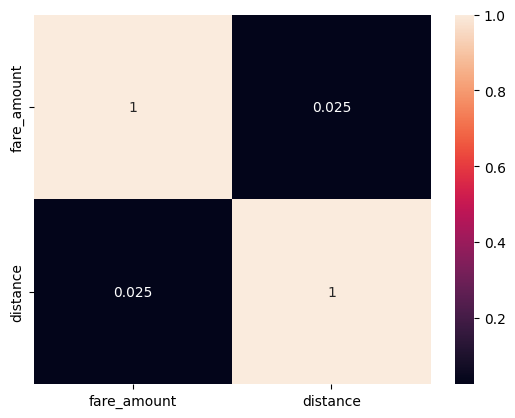

In [47]:
import seaborn as sns
sns.heatmap(corr,annot=True)

<Axes: >

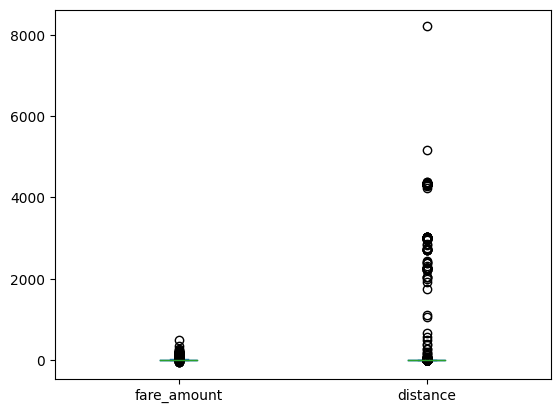

In [48]:
df.plot(kind='box')

In [50]:
for columns in df:
  q1=df[columns].quantile(0.25)
  q3=df[columns].quantile(0.75)
  iqr=q3-q1
  low=q1-1.5*iqr
  high=q3+1.5*iqr
  df[columns]=np.clip(df[columns],low,high)

<Axes: >

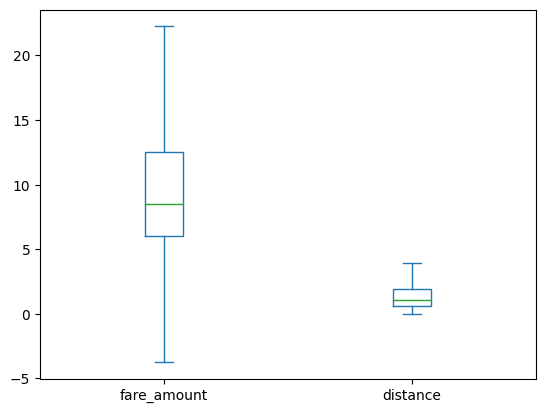

In [51]:
df.plot(kind='box')

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lr=LinearRegression()


In [63]:
X=df[['distance']]
Y=df[['fare_amount']]

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4)

In [65]:
lr.fit(x_train,y_train)

LinearRegression()

In [70]:
y_pred=lr.predict(x_test)

In [71]:
from sklearn.metrics import r2_score

In [72]:
print(r2_score(y_test,y_pred))

0.7155872165142783


In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
rf=RandomForestRegressor()

In [75]:
rf.fit(x_train,y_train)

<ipython-input-75-895403b03771>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestRegressor()

In [76]:
y_pred=rf.predict(x_test)

In [77]:
print(r2_score(y_test,y_pred))

0.6637493258781859
